In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.utils import normalize

In [38]:
data=pd.read_excel('dataset/DATA.xlsx',date_parser=True)

In [39]:
data.head()

,Date,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
0,2018-01-01,1,0,1,1,1,1,1,1,1,0,0
1,2018-01-02,1,1,0,0,1,0,0,1,0,1,0
2,2018-01-03,0,1,0,1,0,1,1,0,0,1,0
3,2018-01-04,1,1,1,0,0,1,0,1,0,1,1
4,2018-01-05,0,0,1,1,1,1,0,1,1,0,1


In [40]:
data_training = data[data['Date']<'2018-02-15'].copy()
data_test = data[data['Date']>='2018-02-15'].copy()

In [41]:
data_training = data_training.drop(['Date'], axis = 1)
data_training

,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
0,1,0,1,1,1,1,1,1,1,0,0
1,1,1,0,0,1,0,0,1,0,1,0
2,0,1,0,1,0,1,1,0,0,1,0
3,1,1,1,0,0,1,0,1,0,1,1
4,0,0,1,1,1,1,0,1,1,0,1
5,1,1,0,0,0,1,0,1,0,0,1
6,1,1,1,1,0,1,1,0,1,0,0
7,1,0,0,0,0,1,1,1,0,0,0
8,0,0,0,0,0,0,1,0,0,0,1
9,1,1,0,0,1,1,1,1,0,0,1


In [42]:
data_test = data_test.drop(['Date'], axis = 1)
data_test

,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
45,1,1,1,1,1,0,1,0,0,0,0
46,0,0,1,0,0,0,0,1,0,0,0
47,1,1,1,0,1,0,0,0,1,0,0
48,1,0,0,0,1,0,0,0,0,1,1
49,0,0,0,0,0,1,1,1,0,1,0
50,1,1,0,1,0,1,0,0,0,0,1
51,1,1,0,1,1,0,1,0,1,1,0
52,1,1,1,0,0,0,0,0,0,0,0
53,1,1,1,0,0,0,0,1,0,0,0
54,1,1,0,1,1,1,0,0,0,0,1


In [43]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(data_training)
type(data_training)

/home/fahad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


pandas.core.frame.DataFrame

In [44]:
x_train_data=normalize(data_training)

In [45]:
np.array(x_train_data)

array([[0.35355339, 0.        , 0.35355339, 0.35355339, 0.35355339,
        0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.        ,
        0.        ],
       [0.4472136 , 0.4472136 , 0.        , 0.        , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.        , 0.4472136 ,
        0.        ],
       [0.        , 0.4472136 , 0.        , 0.4472136 , 0.        ,
        0.4472136 , 0.4472136 , 0.        , 0.        , 0.4472136 ,
        0.        ],
       [0.37796447, 0.37796447, 0.37796447, 0.        , 0.        ,
        0.37796447, 0.        , 0.37796447, 0.        , 0.37796447,
        0.37796447],
       [0.        , 0.        , 0.37796447, 0.37796447, 0.37796447,
        0.37796447, 0.        , 0.37796447, 0.37796447, 0.        ,
        0.37796447],
       [0.4472136 , 0.4472136 , 0.        , 0.        , 0.        ,
        0.4472136 , 0.        , 0.4472136 , 0.        , 0.        ,
        0.4472136 ],
       [0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.

In [46]:
x_train_datas=normalize(training_data)

In [47]:
x_train_datas

array([[0.35355339, 0.        , 0.35355339, 0.35355339, 0.35355339,
        0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.        ,
        0.        ],
       [0.4472136 , 0.4472136 , 0.        , 0.        , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.        , 0.4472136 ,
        0.        ],
       [0.        , 0.4472136 , 0.        , 0.4472136 , 0.        ,
        0.4472136 , 0.4472136 , 0.        , 0.        , 0.4472136 ,
        0.        ],
       [0.37796447, 0.37796447, 0.37796447, 0.        , 0.        ,
        0.37796447, 0.        , 0.37796447, 0.        , 0.37796447,
        0.37796447],
       [0.        , 0.        , 0.37796447, 0.37796447, 0.37796447,
        0.37796447, 0.        , 0.37796447, 0.37796447, 0.        ,
        0.37796447],
       [0.4472136 , 0.4472136 , 0.        , 0.        , 0.        ,
        0.4472136 , 0.        , 0.4472136 , 0.        , 0.        ,
        0.4472136 ],
       [0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.

In [48]:
X_train = []
y_train = []


In [49]:
for i in range(3, training_data.shape[0]):
    X_train.append(training_data[i-3:i])
    y_train.append(training_data[i])

In [50]:
# for i in range(3, x_train_datas.shape[0]):
#     X_train.append(x_train_datas[i-3:i])
#     y_train.append(x_train_datas[i])

In [51]:
np.shape(X_train)

(42, 3, 11)

In [52]:
np.shape(X_train)
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
y_train=y_train.reshape(y_train.shape[0],1,y_train.shape[1])

In [53]:
print(np.shape(X_train),np.shape(y_train))
type(X_train)
type(y_train)

(42, 3, 11) (42, 11)


numpy.ndarray

In [54]:
y_train

array([[1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0., 0., 1., 0.

In [18]:
test_data = scaler.fit_transform(data_test)

/home/fahad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [55]:
X_test = []
y_test = []

In [56]:
for i in range(3, test_data.shape[0]):
    X_test.append(test_data[i-3:i])
    y_test.append(test_data[i])

In [57]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [60]:
print(np.shape(X_test))

print(np.shape(y_test))
test_data


(12, 3, 11)
(12, 11)


array([[1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.]])

In [23]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [24]:
y_test=y_test.reshape(y_test.shape[0],1,y_test.shape[1])

In [25]:

lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(42, 3, 11), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(11,activation='sigmoid'))
optimizer = optimizers.Adam(lr=1e-4)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['MAE'])

In [26]:
BATCH_SIZE=32
history = lstm_model.fit(X_train, y_train, epochs=5, verbose=1,shuffle=False,)

Train on 42 samples
Epoch 1/5
42/42 [==============================] - 2s 42ms/sample - loss: 0.2490 - MAE: 0.4988
Epoch 2/5
42/42 [==============================] - 0s 179us/sample - loss: 0.2485 - MAE: 0.4982
Epoch 3/5
42/42 [==============================] - 0s 219us/sample - loss: 0.2481 - MAE: 0.4977
Epoch 4/5
42/42 [==============================] - 0s 154us/sample - loss: 0.2490 - MAE: 0.4986
Epoch 5/5
42/42 [==============================] - 0s 249us/sample - loss: 0.2485 - MAE: 0.4980


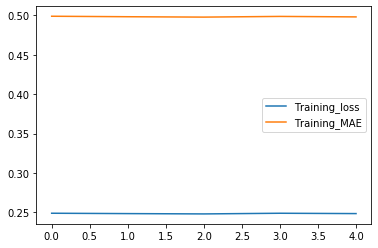

In [27]:
plt.plot(history.history['loss'],label='Training_loss')
plt.plot(history.history['MAE'],label='Training_MAE')
plt.legend()
plt.show()

In [28]:

history = lstm_model.fit(X_train, y_train, epochs=20, verbose=1, 
                    shuffle=False, validation_data=(trim_dataset(X_test, 42),
                    trim_dataset(y_test, 42)))

ValueError: A target array with shape (0, 1, 11) was passed for an output of shape (42, 11) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [ ]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (3, 11)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 11,activation='sigmoid'))
optimizer = optimizers.Adam(lr=1e-4)
regressior.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
#regressior.fit_generator(X_train, y_train, epochs=20)

In [ ]:
BATCH_SIZE=32
history = regressior.fit(X_train, y_train, epochs=100, verbose=1,shuffle=False,validation_data=(X_test,y_test))

In [ ]:
plt.plot(history.history['loss'],label='Training_loss')
plt.plot(history.history['val_loss'],label='Training_MAE')
plt.legend()
plt.show()

In [ ]:
X_test[7]

In [ ]:
y_test[7]

In [ ]:
regressior.predict(X_test[7])

In [ ]:
y_test

In [ ]:
np.shape(X_test)

In [ ]:
np.shape(y_test)

In [ ]:
type(X_test)

In [ ]:
type(y_test)